In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dfx=pd.read_csv("Desktop/weightedX.csv")
dfy=pd.read_csv("Desktop/weightedY.csv")

In [3]:
x=dfx.values
y=dfy.values

In [4]:
x.shape

(99, 1)

In [5]:
y.shape

(99, 1)

In [43]:
x=(x-x.mean())/x.std()

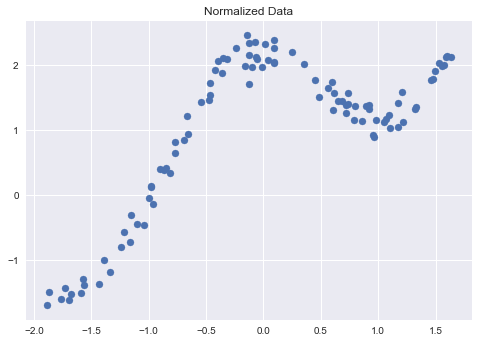

In [44]:
plt.style.use("seaborn")
plt.scatter(x,y)
plt.title("Normalized Data")
plt.show()

In [45]:
def getW(queryPoint,X,tau):
    m=X.shape[0]
    w=np.mat(np.eye(m))
    
    for i in range(m):
        xi=X[i]
        x=queryPoint
        w[i,i]=np.exp(np.dot((xi-x),(xi-x).T)/(-2*tau*tau))
    return w

In [46]:
#x=np.mat(x)
#y=np.mat(x)
#m=x.shape[0]
#W=getW(-1,x,0.5)
#print(W.shape)
#print(W)

In [47]:
def predict(X,Y,query_x,tau):
    m=X.shape[0]
    ones=np.ones((m,1))
    x_=np.hstack((X,ones))
    qx=np.mat([query_x,1])
    w=getW(qx,x_,tau)
    #theta=(X'WX)inv * X'WY
    theta=np.linalg.pinv(x_.T*(w*x_))*(x_.T*(w*Y))
    
    pred=np.dot(qx,theta)
    #print(theta.shape)
    return theta,pred

In [48]:
theta,pred=predict(x,y,1.0,1.0)

In [49]:
print(theta)

[[0.14069504]
 [1.45348191]]


In [50]:
print(pred)

[[1.59417694]]


In [56]:
def plotPrediction(tau):
    x_test=np.linspace(-2,2,20)
    y_test=[]
    for xq in x_test:
        theta,pred=predict(x,y,xq,tau)
        y_test.append(pred[0][0])
    y_test=np.array(y_test)
    Xorg=np.array(x)
    Yorg=np.array(y)
    
    plt.title("Prediction %.2f"%tau)
    plt.scatter(Xorg,Yorg)
    plt.scatter(x_test,y_test,color="red")
    plt.show()

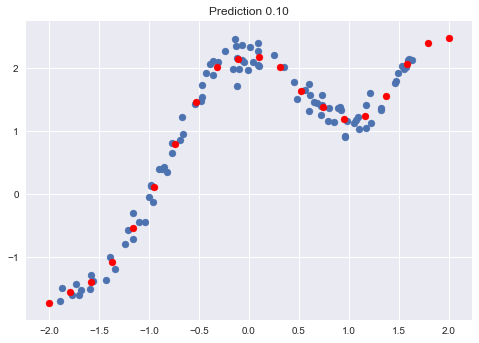

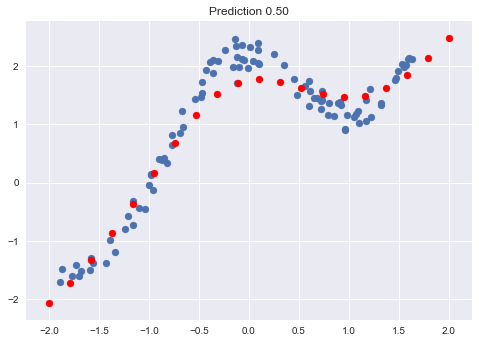

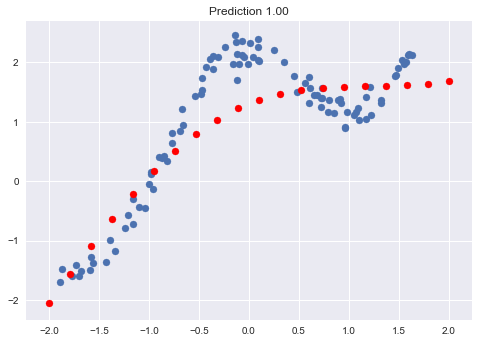

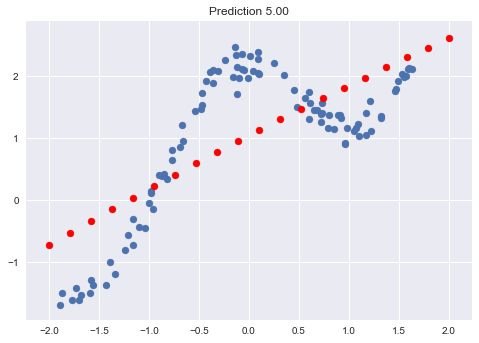

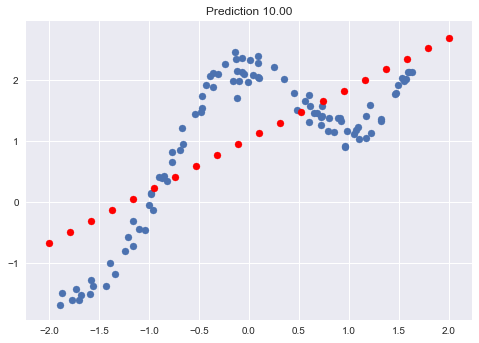

In [59]:
taus=[0.1,0.5,1,5,10]
for t in taus:
    plotPrediction(t)